In [66]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")
df = df.iloc[1:].reset_index(drop=True)

In [67]:
print("Total Divisions:", df["Q24_1"].nunique())
df["Q24_1"].unique()

Total Divisions: 44


array(['Finance', 'Strategy', 'IT', 'Logistics', 'Procurement',
       'Merchandise Management', 'Global eCommerce', 'Other',
       'Human Resources', 'Construction & Facility Management',
       'Retail Store', 'Controlling', 'Retail Operations',
       'Sustainability', 'Legal', 'No answer',
       'Product Development & Operations', 'Business Unit BOSS Menswear',
       'Corporate Communications', 'Marketing & Brand Communications',
       'Business Unit HUGO', 'Business Units Ticino', 'Global Retail',
       'eCommerce', 'Business Unit BOSS Womenswear', 'Internal Audit',
       'Technical Center', 'Retail Management', 'Licences',
       'Sourcing & Production', 'Store Design & Visual Merchandising',
       'Materials Management', 'Global Travel Retail', 'Retail Services',
       'Digital Excellence', 'Production Izmir - Jersey',
       'Production Izmir - Womenswear',
       'Production Izmir- Menswear (Suit)', 'Production Izmir - Shirt',
       'Real Estate Management', "Log. Dis

In [68]:
count = df["Q24_1"].value_counts()
count

Q24_1
Business Unit BOSS Menswear               411
Retail Store                              239
Other                                     229
Production Izmir- Menswear (Suit)         187
Human Resources                           148
Product Development & Operations          129
IT                                        122
Logistics                                 114
Business Units Ticino                      99
No answer                                  97
Business Unit BOSS Womenswear              83
Production Izmir - Jersey                  82
Production Izmir - Womenswear              67
Business Unit HUGO                         67
Retail Management                          64
Production Izmir - Shirt                   60
Finance                                    59
Procurement                                56
Merchandise Management                     54
Technical Center                           40
Marketing & Brand Communications           38
Store Design & Visual Mercha

In [72]:
df_to_keep = count[count > 50].index
df = df[df["Q24_1"].isin(df_to_keep)]

df = df[~df['Q24_1'].isin(['Other', 'No answer'])]
df.dropna(inplace=True)

df.shape

(1946, 12)

In [73]:
# Columns that talk about how well a certain quality is reflected in the division
qualities_columns = ["Q8", "Q10", "Q12", "Q14", "Q16", "Q18"]
division_column = "Q24_1"
extra_columns = ["Q37", "Q25", "Q26", "Q27", "Q23_1"]
df = df[qualities_columns + [division_column] + extra_columns]

null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

# Define a mapping from categorical responses to numerical values
response_mapping = {
    "Very poor": 1,
    "Poor": 2,
    "Satisfactory": 3,
    "Well": 4,
    "Very well": 5,
    "No answer": None,
}

Shape:  (1946, 12)
Null values in each column:
 Q8       0
Q10      0
Q12      0
Q14      0
Q16      0
Q18      0
Q24_1    0
Q37      0
Q25      0
Q26      0
Q27      0
Q23_1    0
dtype: int64


In [74]:
df.columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
    "Division",
    "Occupational Group",
    "Leadership Position",
    "Tenure",
    "Age",
    "Country"
]
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
0,Satisfactory,Satisfactory,Well,Satisfactory,Well,Poor,Finance,White Collar,Yes,1-3 years,43 - 50,Netherlands
2,No answer,Very poor,Very poor,Very poor,Very poor,Very poor,IT,White Collar,No,5-10 years,27 - 34,Germany
3,Poor,Well,Poor,Satisfactory,Very poor,Poor,Logistics,White Collar,No,3-5 years,27 - 34,Germany
4,Very well,Very well,Very well,Well,Very well,Well,Procurement,No answer,No,1-3 years,27 - 34,Switzerland
5,Well,Poor,Satisfactory,Satisfactory,Well,Well,IT,Blue Collar,Yes,> 10 years,35 - 42,Germany


In [75]:
# Convert categorical responses to numerical values for quality columns
qualities_columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
]

for quality in qualities_columns:
    df[quality] = df[quality].map(response_mapping)
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
0,3.0,3.0,4.0,3.0,4.0,2.0,Finance,White Collar,Yes,1-3 years,43 - 50,Netherlands
2,NaN,1.0,1.0,1.0,1.0,1.0,IT,White Collar,No,5-10 years,27 - 34,Germany
3,2.0,4.0,2.0,3.0,1.0,2.0,Logistics,White Collar,No,3-5 years,27 - 34,Germany
4,5.0,5.0,5.0,4.0,5.0,4.0,Procurement,No answer,No,1-3 years,27 - 34,Switzerland
5,4.0,2.0,3.0,3.0,4.0,4.0,IT,Blue Collar,Yes,> 10 years,35 - 42,Germany


In [76]:
df.dropna(inplace=True)
null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

Shape:  (1885, 12)
Null values in each column:
 TRUST                     0
ENTREPRENEURIAL SPIRIT    0
YOUTHFUL SPIRIT           0
SIMPLICITY & QUALITY      0
TEAM MENTALITY            0
PERSONAL OWNERSHIP        0
Division                  0
Occupational Group        0
Leadership Position       0
Tenure                    0
Age                       0
Country                   0
dtype: int64


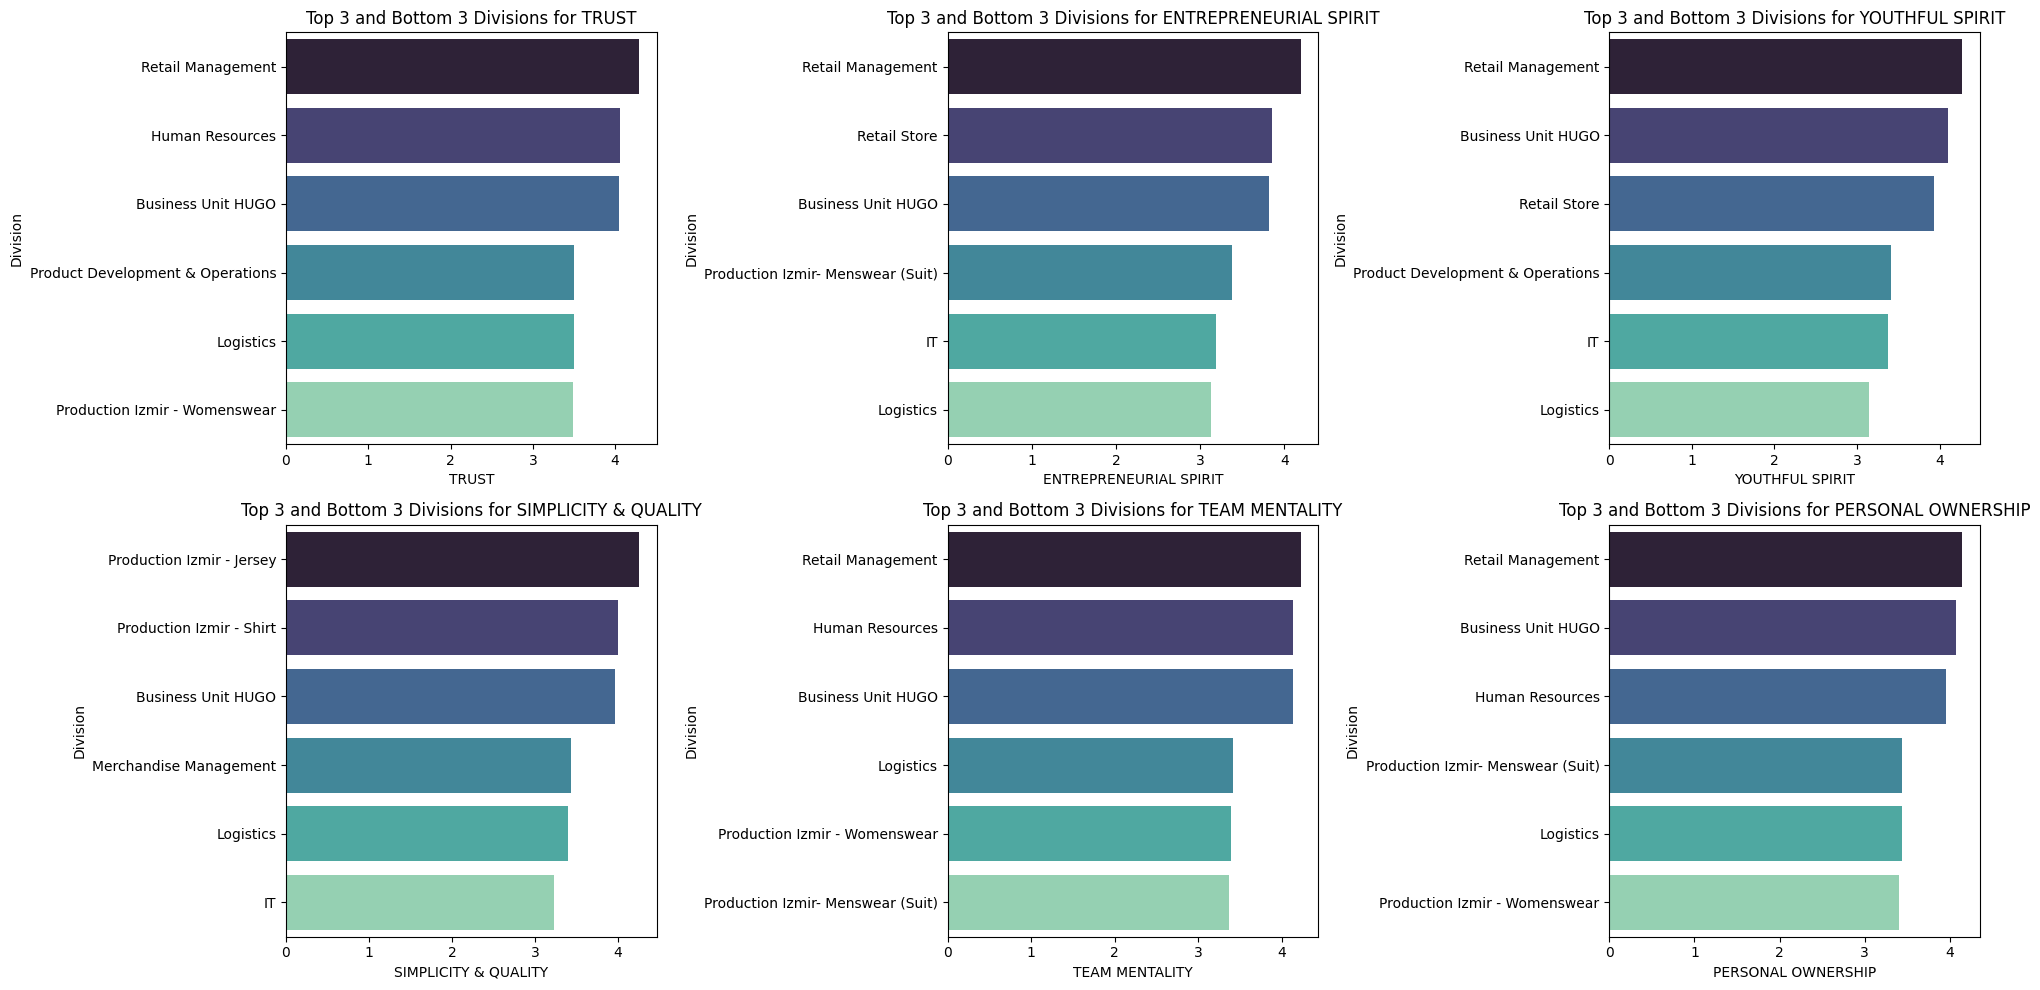

In [78]:
country_data = df[qualities_columns + ['Division']]
country_data = country_data.groupby('Division').mean().reset_index()

# Function to get top 5 and bottom 6 for each quality (column)
def get_top_bottom(df, column):
    sorted_df = df[["Division", column]].sort_values(by=column, ascending=False)
    top_5 = sorted_df.head(3)
    bottom_6 = sorted_df.tail(3)
    combined_df = pd.concat([top_5, bottom_6])
    return combined_df


# Create subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each column and assign each plot to a subplot
for i, col in enumerate(
    qualities_columns
):  # Loop over qualities columns list
    # Get top 5 and bottom 6 for the current column
    top_bottom_df = get_top_bottom(country_data, col)

    # Plot in the corresponding subplot
    sns.barplot(
        x=col, y="Division", data=top_bottom_df, palette="mako", ax=ax[i // 3, i % 3]
    )
    ax[i // 3, i % 3].set_title(f"Top 3 and Bottom 3 Divisions for {col}")
    ax[i // 3, i % 3].set_xlabel(col)
    ax[i // 3, i % 3].set_ylabel("Division")

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [83]:
extracted_data = df[df['Division'].isin(['Retail Management', 'Logistics', 'IT'])]


grouped_data = extracted_data.groupby(["Division", "Age"])[qualities_columns].mean()
print(grouped_data)

                                TRUST  ENTREPRENEURIAL SPIRIT  \
Division          Age                                           
IT                27 - 34    3.741935                3.000000   
                  35 - 42    3.615385                3.269231   
                  43 - 50    3.722222                3.222222   
                  51 - 58    3.600000                3.600000   
                  No answer  3.133333                3.000000   
                  ≤ 26       3.933333                3.333333   
                  ≥ 59       4.000000                3.000000   
Logistics         27 - 34    3.190476                2.952381   
                  35 - 42    3.814815                3.296296   
                  43 - 50    3.695652                3.217391   
                  51 - 58    3.500000                3.222222   
                  No answer  2.900000                3.100000   
                  ≤ 26       3.800000                2.600000   
                  ≥ 59   

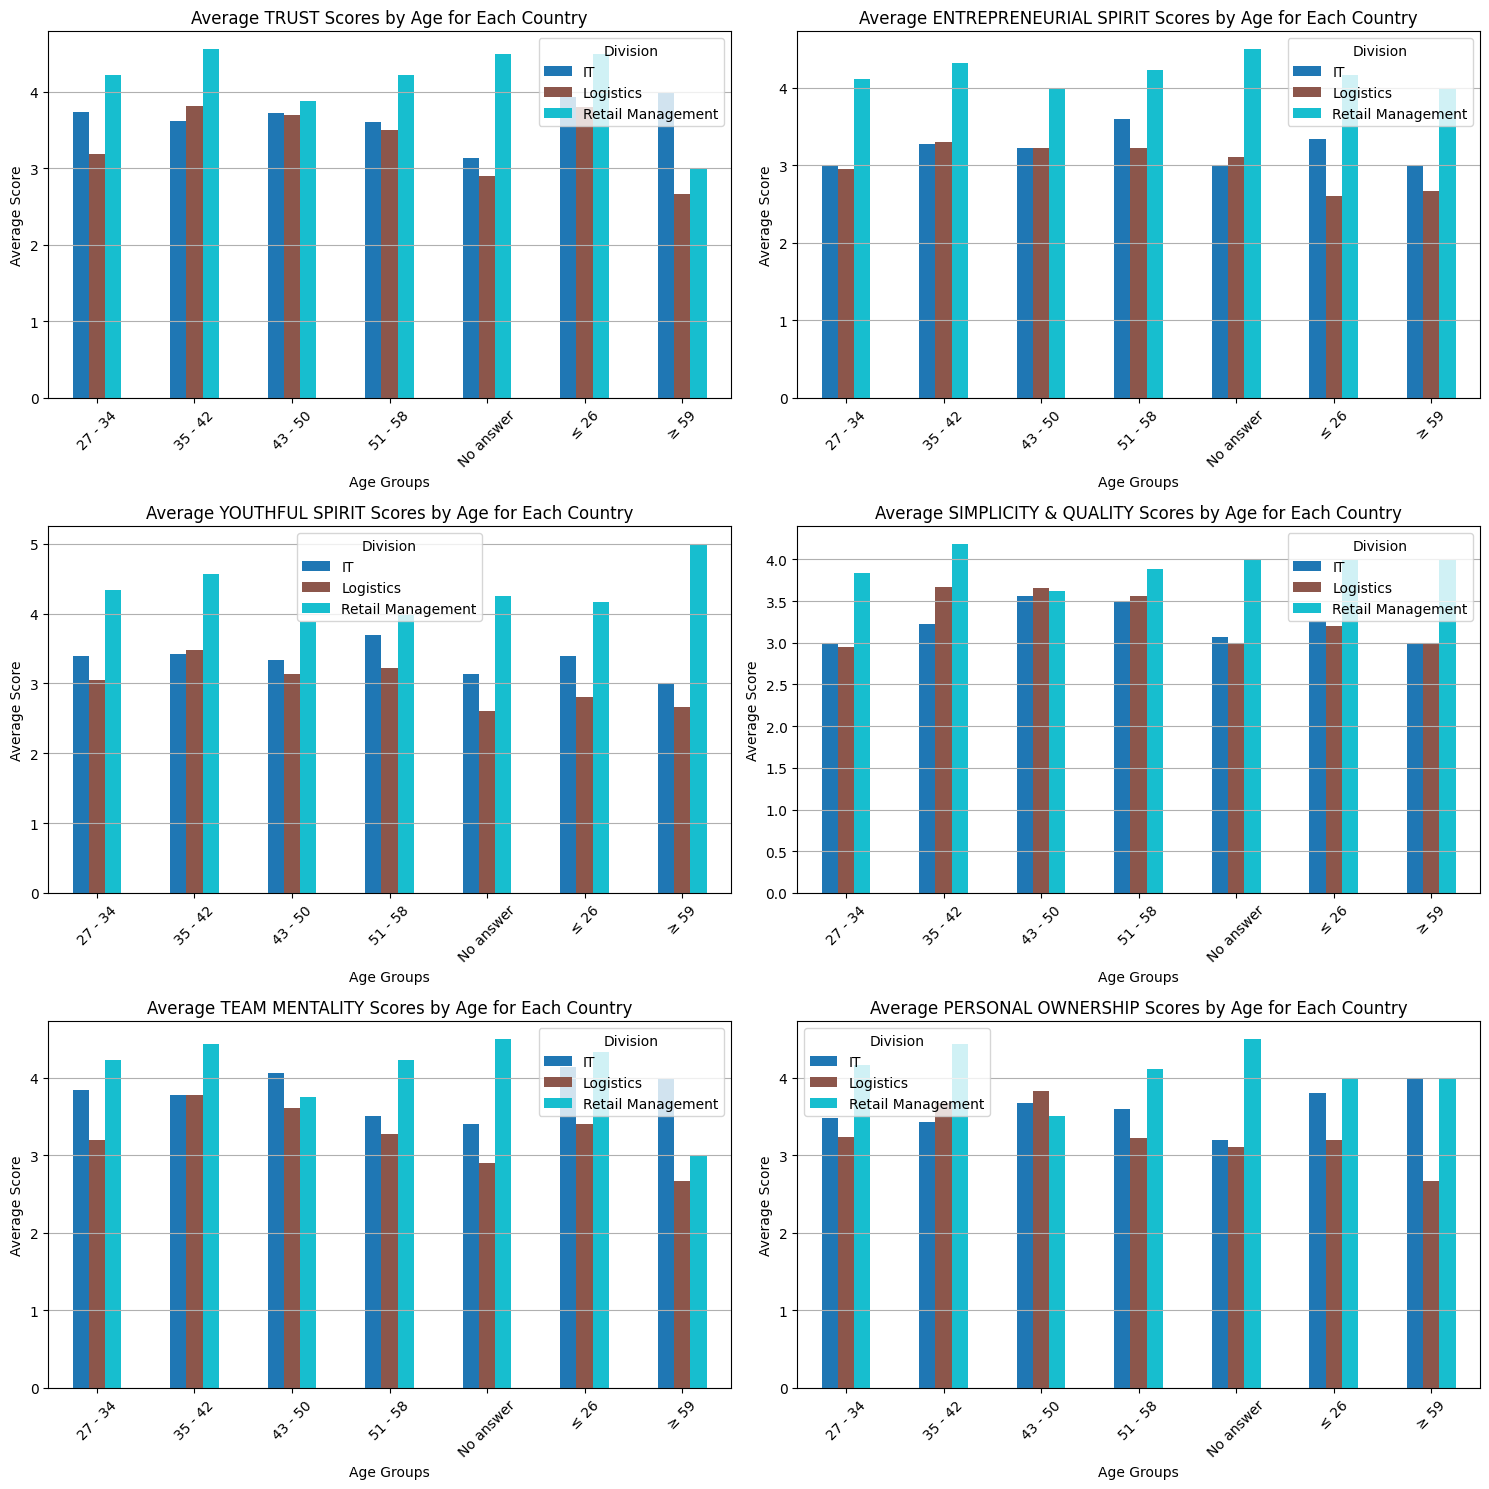

In [84]:
import numpy as np

n_qualities = len(qualities_columns)
countries = grouped_data.index.levels[0]  # List of unique countries
n_rows = (n_qualities + 1) // 2  # Two plots per row

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Step 4: Create a color map for countries
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))  # Using tab10 colormap for different countries

# Step 5: Loop through each quality and plot for each country
for i, quality in enumerate(qualities_columns):
    # Step 6: Unstack the data for the current quality
    quality_data = grouped_data[quality].unstack(level=0)  # Unstack to separate countries

    # Step 7: Plot each country's data with specific colors
    quality_data.plot(kind='bar', ax=axes[i], color=colors)
    
    axes[i].set_title(f'Average {quality} Scores by Age for Each Country')
    axes[i].set_xlabel('Age Groups')
    axes[i].set_ylabel('Average Score')
    axes[i].set_xticklabels(quality_data.index, rotation=45)
    axes[i].grid(axis='y')

# Hide any empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The charts you provided allow us to analyze the **impact of age** on various employee perceptions across the divisions of **Retail Management**, **Logistics**, and **IT**. Here are the key insights and recognizable patterns based on the data:

### Impact of Age

1. **Trust Scores**:
   - The **Trust** scores appear to be relatively high across all age groups for Retail Management. Employees under 35 years old show particularly high levels of trust.
   - For **Logistics**, the trust scores are lower across all age groups, indicating potential issues in leadership or communication within that division.

2. **Entrepreneurial Spirit**:
   - Retail Management shows a strong **Entrepreneurial Spirit** across age groups, especially in younger employees (27-34). This indicates that younger employees feel empowered to take initiative, which is crucial for innovation.
   - Logistics has lower scores in this area, suggesting a lack of encouragement for new ideas or initiatives.

3. **Youthful Spirit**:
   - The **Youthful Spirit** scores for Retail Management are particularly high in the younger age groups, reflecting an engaging and dynamic work environment. 
   - Logistics shows more variability, with lower scores in the same age category, which may indicate a less engaging workplace for younger employees.

4. **Simplicity & Quality**:
   - Retail Management maintains high **Simplicity & Quality** scores across age groups, indicating effective processes and clarity in operations.
   - Logistics shows lower scores in this area, suggesting employees might find processes to be more cumbersome or confusing.

5. **Team Mentality**:
   - The **Team Mentality** scores indicate strong collaboration in Retail Management, particularly among younger employees. This division promotes teamwork and support, leading to higher satisfaction.
   - In Logistics, the scores are lower across age groups, potentially indicating silos or a lack of collaborative practices.

6. **Personal Ownership**:
   - Employees in Retail Management feel a strong sense of **Personal Ownership**, particularly in younger age groups. This ownership can lead to higher engagement and accountability.
   - Logistics employees exhibit lower personal ownership scores, suggesting that they may not feel as responsible for their contributions or roles within the company.

### Recognizable Patterns
- **Positive Culture in Retail Management**: The patterns indicate that Retail Management fosters a positive culture that promotes trust, collaboration, and empowerment across all age groups.
- **Challenges in Logistics**: The lower scores in Logistics highlight areas needing improvement, especially in building trust and encouraging personal ownership.
- **Engagement of Younger Employees**: Younger employees in Retail Management show significantly higher engagement and satisfaction levels than their counterparts in Logistics, suggesting that age-related strategies may be beneficial.

### Conclusions
- **Strength of Retail Management**: The division’s strong performance indicates effective management practices that promote a positive work environment.
- **Opportunities for Improvement**: Logistics should focus on enhancing trust, fostering teamwork, and encouraging a sense of ownership among employees, especially the younger demographic.
- **Focus on Age Dynamics**: Tailoring engagement strategies based on age group insights can lead to improvements in employee perceptions and satisfaction.

### Next Steps
- **Qualitative Assessments**: Conduct interviews or surveys to gather feedback from employees in Logistics about their experiences and perceptions.
- **Implement Best Practices**: Consider implementing strategies from Retail Management that promote trust and collaboration across all divisions.

If you have any specific analyses or follow-up actions you’d like to take based on these insights, please let me know!

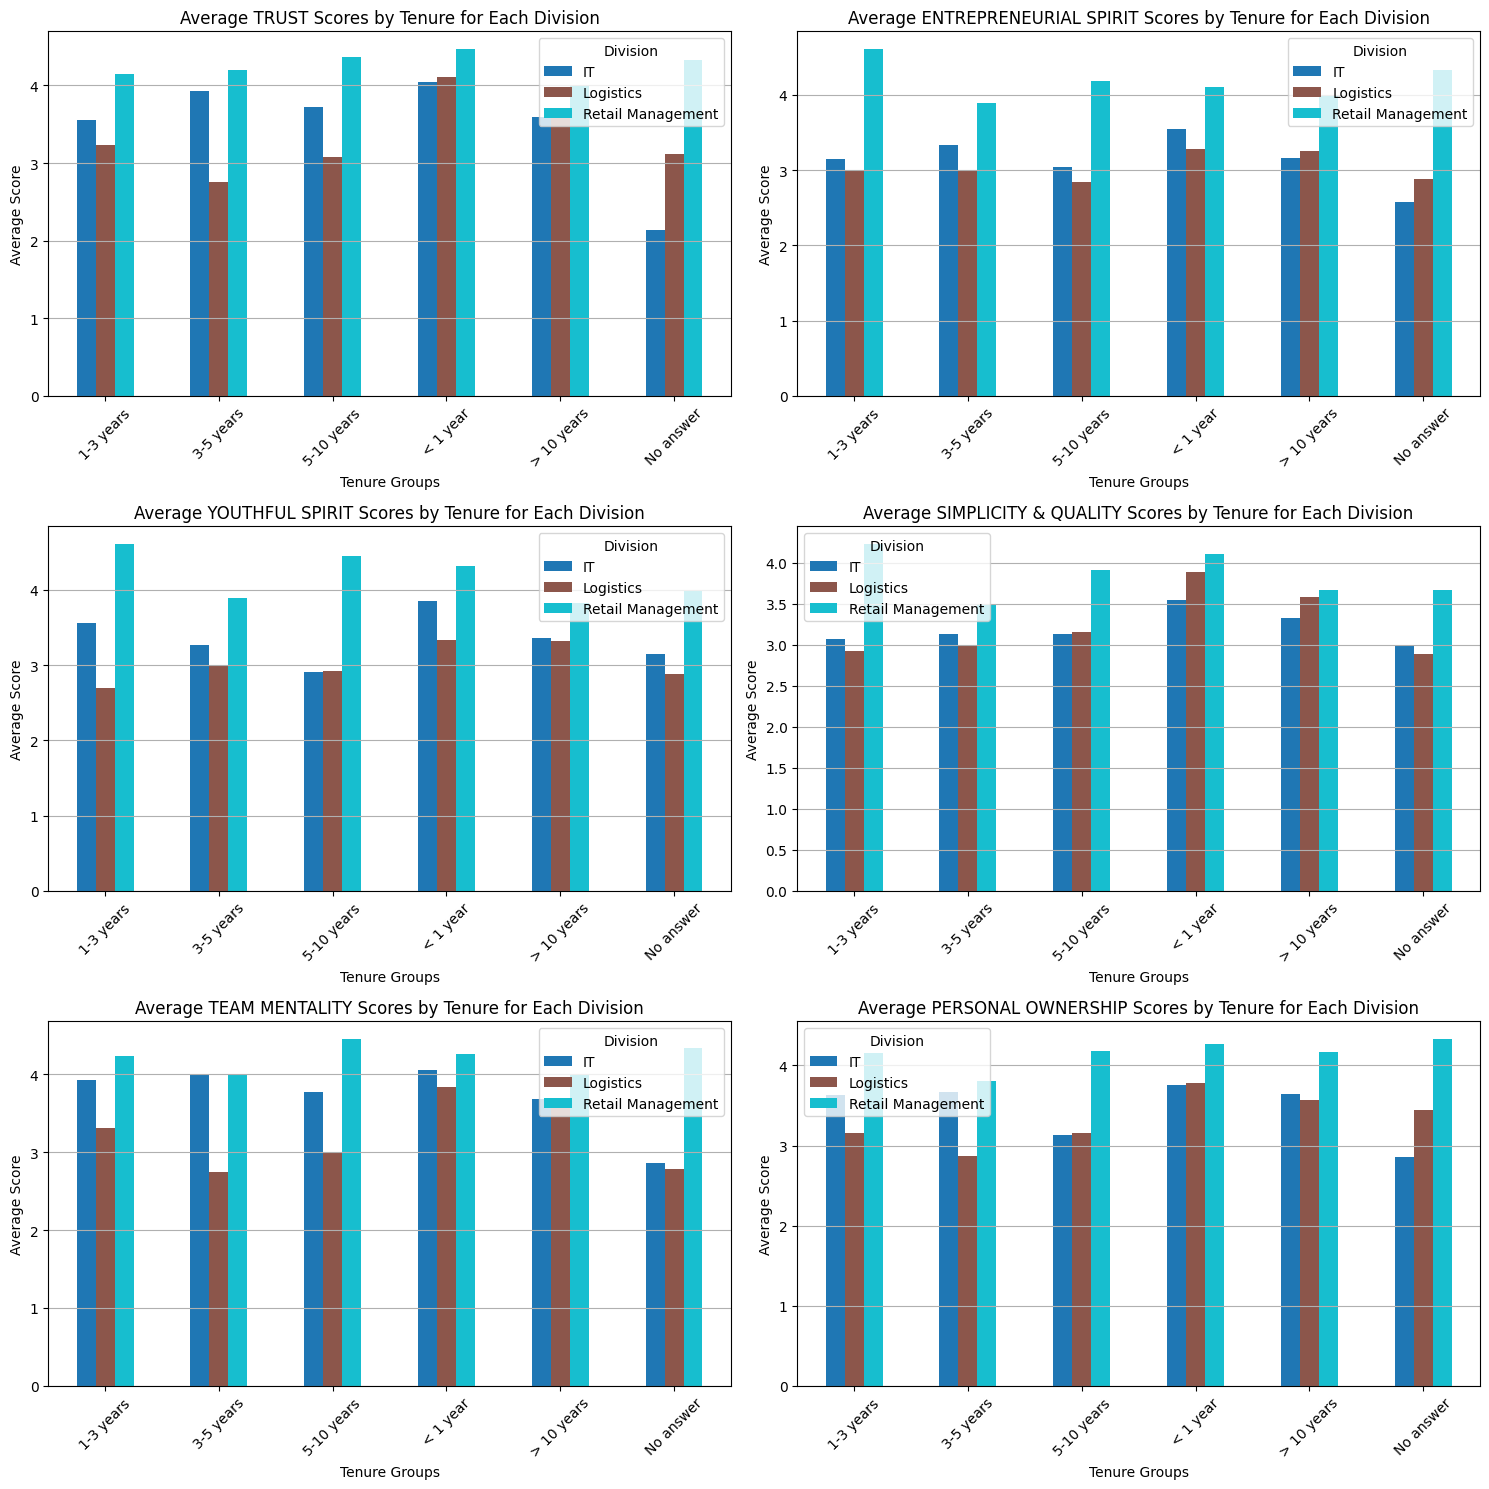

In [86]:
grouped_data = extracted_data.groupby(["Division", "Tenure"])[qualities_columns].mean()

# Step 2: Drop any 'No answer' if necessary (if you have that in your data)
# grouped_data = grouped_data.drop('No answer', errors='ignore')

# Step 3: Create a figure to hold multiple subplots
n_qualities = len(qualities_columns)
countries = grouped_data.index.levels[0]  # List of unique countries
n_rows = (n_qualities + 1) // 2  # Two plots per row

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Step 4: Create a color map for countries
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))  # Using tab10 colormap for different countries

# Step 5: Loop through each quality and plot for each country
for i, quality in enumerate(qualities_columns):
    # Step 6: Unstack the data for the current quality
    quality_data = grouped_data[quality].unstack(level=0)  # Unstack to separate countries

    # Step 7: Plot each country's data with specific colors
    quality_data.plot(kind='bar', ax=axes[i], color=colors)
    
    axes[i].set_title(f'Average {quality} Scores by Tenure for Each Division')
    axes[i].set_xlabel('Tenure Groups')
    axes[i].set_ylabel('Average Score')
    axes[i].set_xticklabels(quality_data.index, rotation=45)
    axes[i].grid(axis='y')

# Hide any empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Based on the insights drawn from the charts comparing **Retail Management**, **Logistics**, and **IT** across various qualities and tenure groups, several recognizable patterns emerge:

### Recognizable Patterns

1. **Consistent High Performance in Retail Management**:
   - Retail Management shows a consistent pattern of high scores across all qualities regardless of tenure. This indicates a strong culture and effective leadership that fosters positive employee experiences.

2. **Trust and Empowerment**:
   - Higher **Trust** scores correlate with higher **Entrepreneurial Spirit** scores in Retail Management. This suggests that when employees feel trusted, they are more likely to feel empowered to take initiative and innovate.

3. **Impact of Tenure**:
   - In Retail Management, newer employees (1-3 years) often exhibit strong engagement and higher scores, which may indicate effective onboarding and a supportive work environment. Conversely, Logistics shows lower scores, particularly among new employees, suggesting a potential gap in integration or support.

4. **Youthful Engagement**:
   - The **Youthful Spirit** scores are notably high in Retail Management, indicating that the division fosters a dynamic and energetic workplace that appeals to younger employees. This contrasts with Logistics, where lower scores suggest less engagement among younger staff.

5. **Team Dynamics**:
   - **Team Mentality** scores are consistently high in Retail Management, indicating strong collaboration and support within teams. This pattern might be weaker in Logistics, where lower scores suggest potential silos or lack of cooperation.

6. **Perceptions of Simplicity and Quality**:
   - Higher scores in **Simplicity & Quality** for Retail Management indicate that processes are perceived as effective and efficient. This perception may not be as prevalent in Logistics and IT, where scores tend to be lower, reflecting potential challenges in process management.

7. **Personal Ownership Correlation**:
   - Higher **Personal Ownership** scores in Retail Management indicate that employees feel a sense of accountability and responsibility for their work. This is less pronounced in Logistics, where lower scores suggest employees may feel less connected to their roles.

### Implications of Recognized Patterns
- **Cultural Differences**: The strong performance in Retail Management indicates a positive culture that could serve as a model for other divisions.
- **Engagement Strategies**: Understanding the factors contributing to the high scores in Retail Management can inform engagement strategies in Logistics and IT, such as improving trust and enhancing team dynamics.
- **Focus on Onboarding**: The success in Retail Management among new employees highlights the importance of effective onboarding and integration practices, which could be beneficial if applied to Logistics.

### Next Steps
1. **Further Analysis**: Conduct a deeper analysis to explore the specific elements contributing to the positive patterns in Retail Management.
2. **Implementation of Best Practices**: Share findings and best practices from Retail Management with other divisions to help improve employee engagement and perceptions.
3. **Monitoring Changes**: After implementing strategies, monitor changes in employee sentiment and engagement across divisions.

If you have specific aspects of these patterns you would like to explore further or any particular analyses in mind, please let me know!

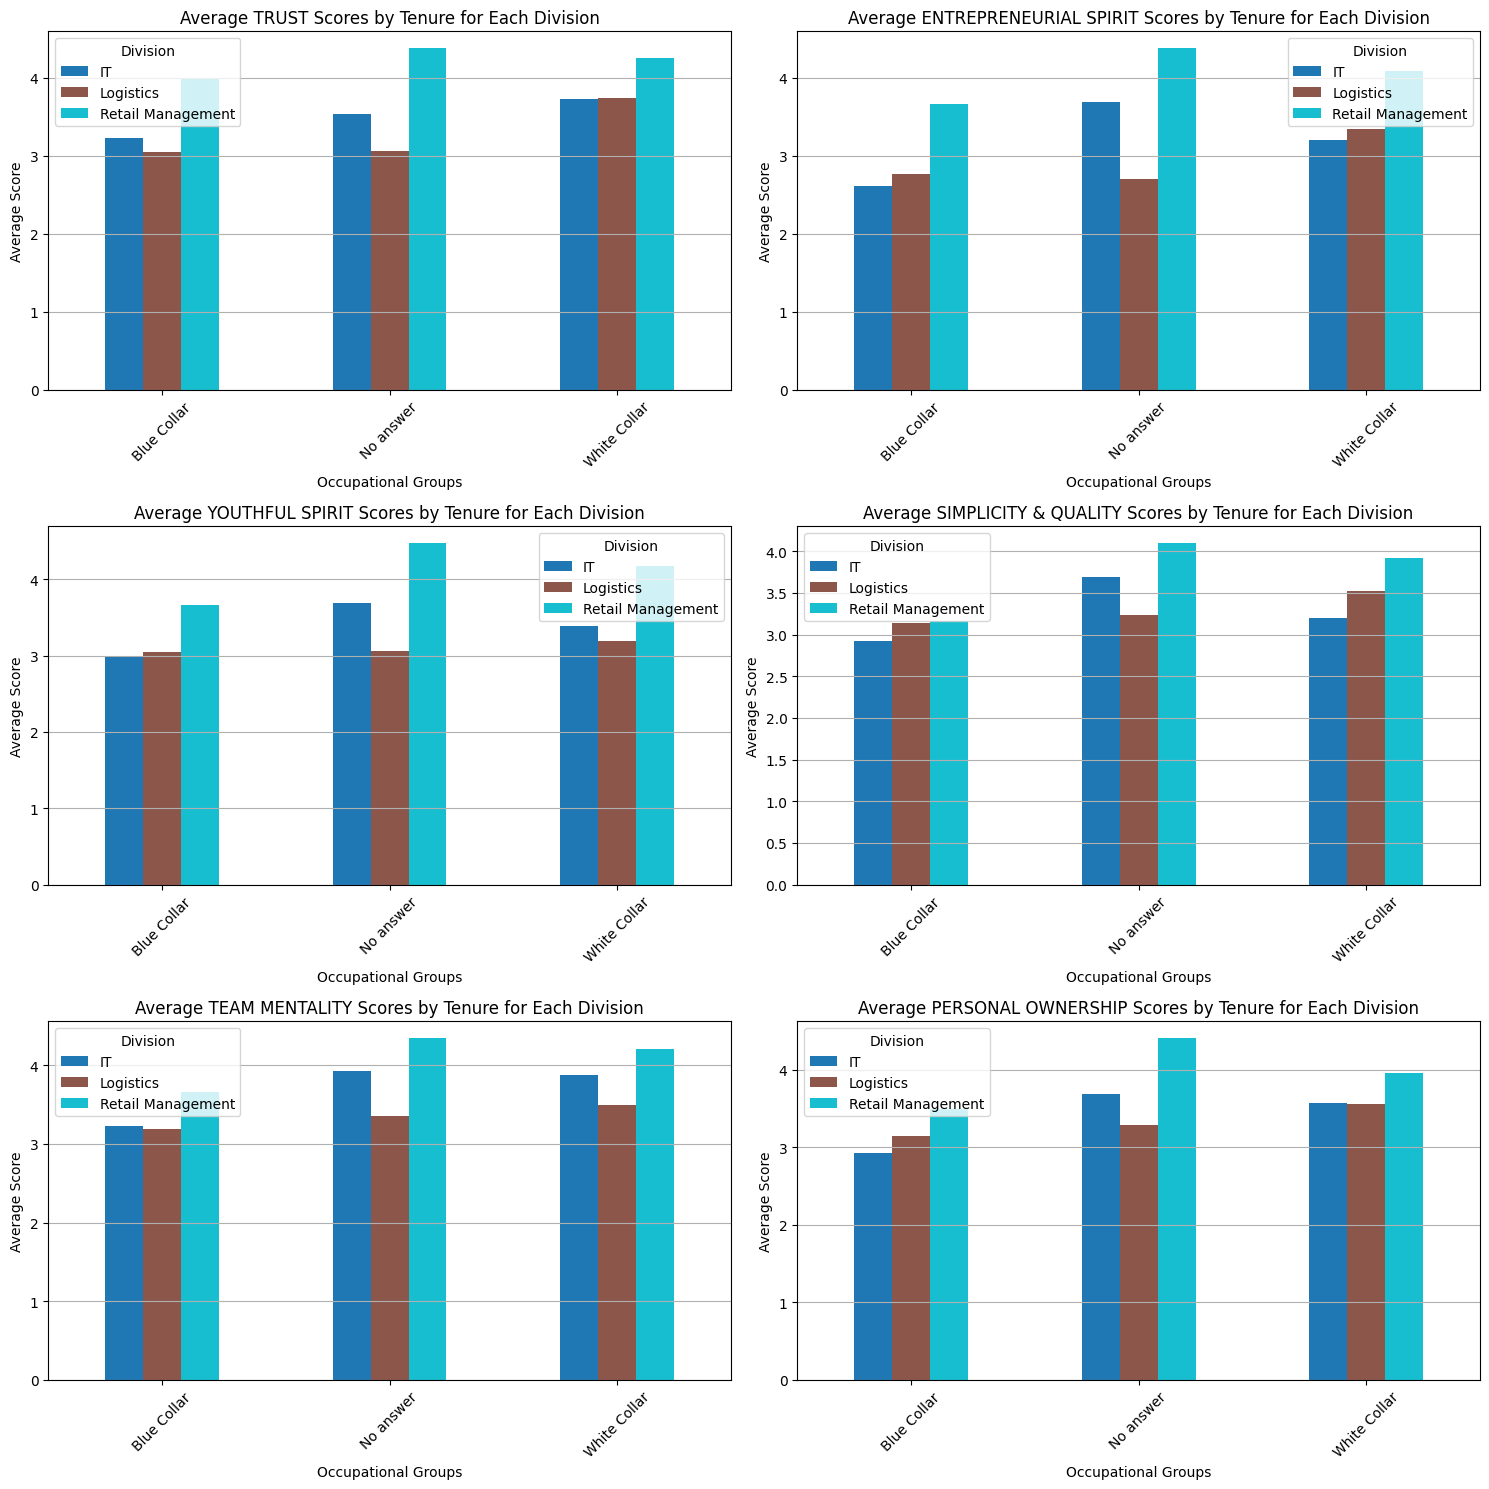

In [88]:
grouped_data = extracted_data.groupby(["Division", "Occupational Group"])[qualities_columns].mean()

# Step 2: Drop any 'No answer' if necessary (if you have that in your data)
# grouped_data = grouped_data.drop('No answer', errors='ignore')

# Step 3: Create a figure to hold multiple subplots
n_qualities = len(qualities_columns)
countries = grouped_data.index.levels[0]  # List of unique countries
n_rows = (n_qualities + 1) // 2  # Two plots per row

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Step 4: Create a color map for countries
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))  # Using tab10 colormap for different countries

# Step 5: Loop through each quality and plot for each country
for i, quality in enumerate(qualities_columns):
    # Step 6: Unstack the data for the current quality
    quality_data = grouped_data[quality].unstack(level=0)  # Unstack to separate countries

    # Step 7: Plot each country's data with specific colors
    quality_data.plot(kind='bar', ax=axes[i], color=colors)
    
    axes[i].set_title(f'Average {quality} Scores by Tenure for Each Division')
    axes[i].set_xlabel('Occupational Groups')
    axes[i].set_ylabel('Average Score')
    axes[i].set_xticklabels(quality_data.index, rotation=45)
    axes[i].grid(axis='y')

# Hide any empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


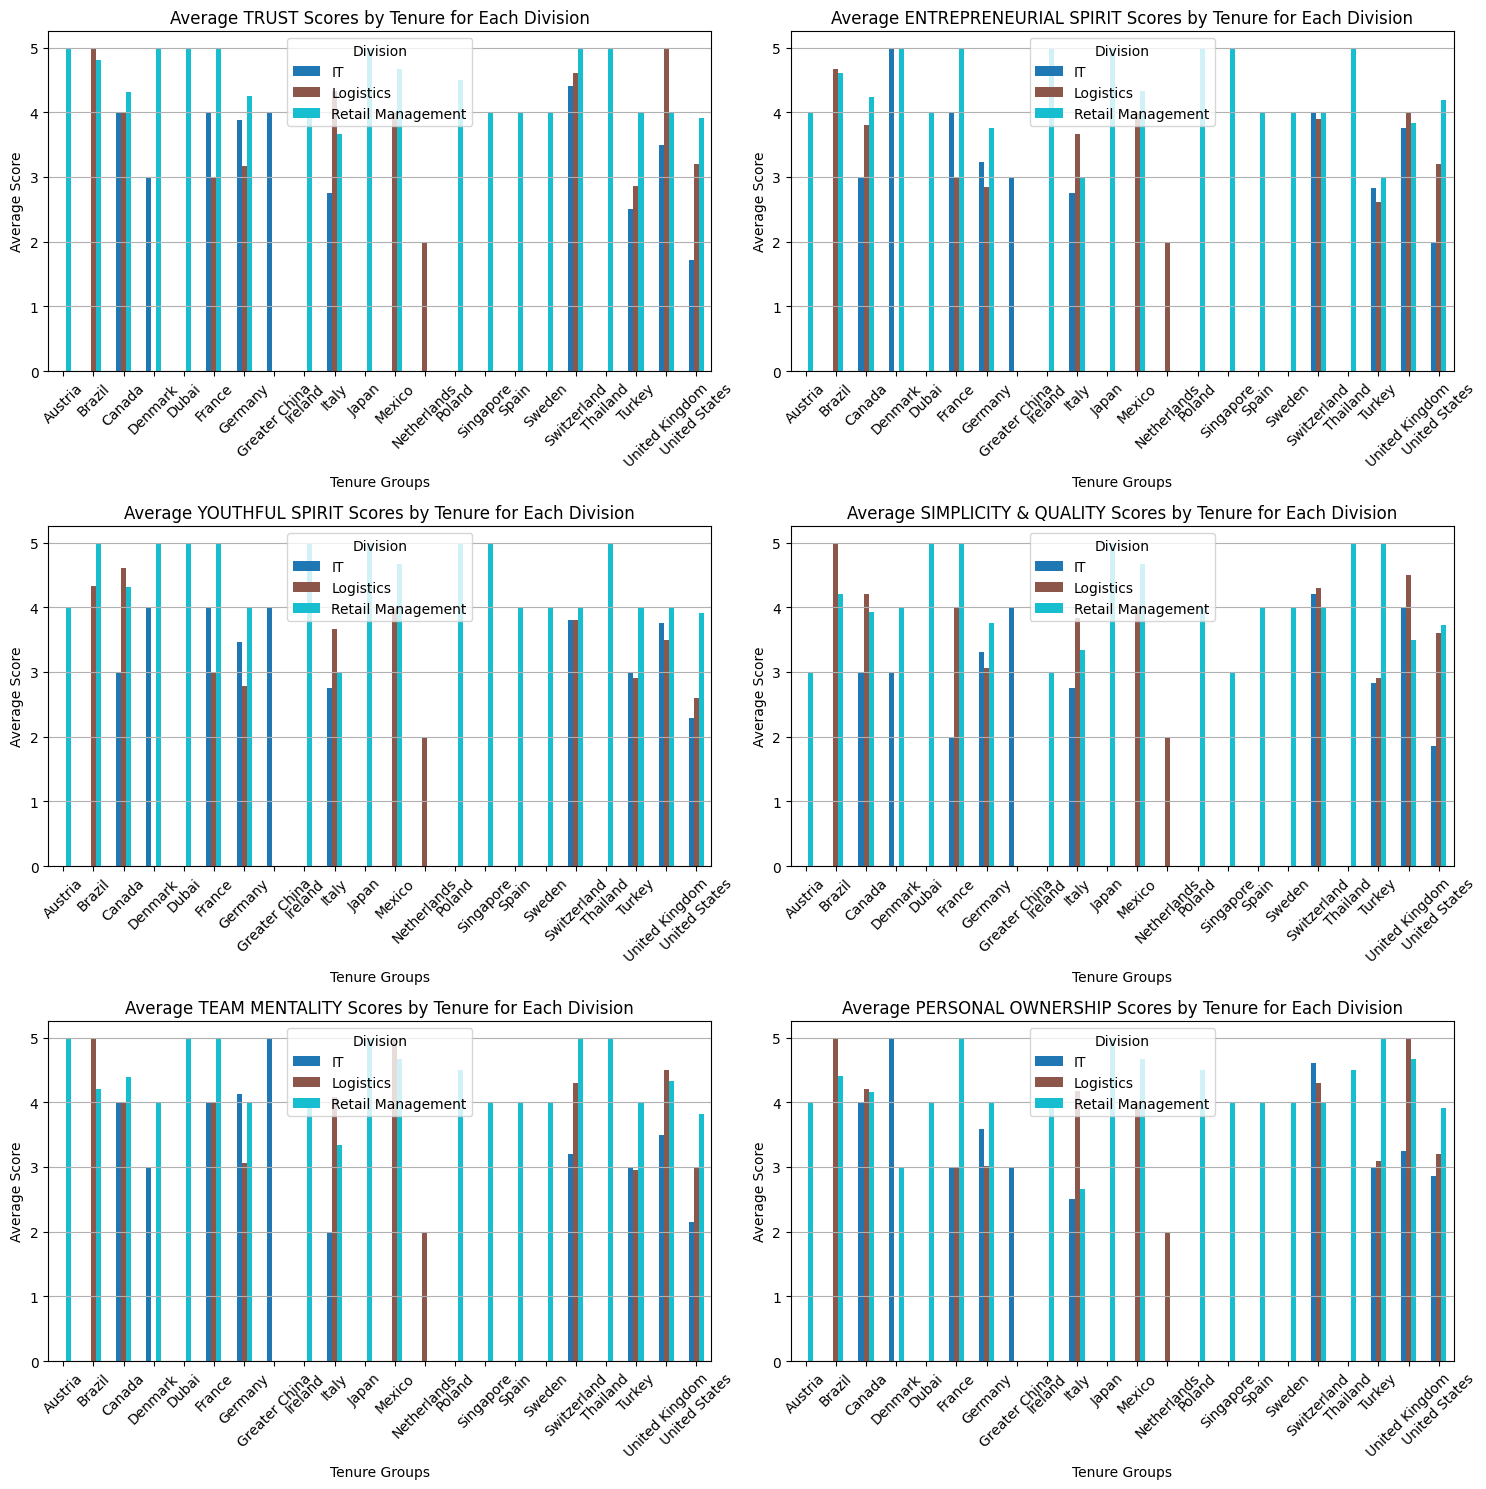

In [89]:
grouped_data = extracted_data.groupby(["Division", "Country"])[qualities_columns].mean()

# Step 2: Drop any 'No answer' if necessary (if you have that in your data)
# grouped_data = grouped_data.drop('No answer', errors='ignore')

# Step 3: Create a figure to hold multiple subplots
n_qualities = len(qualities_columns)
countries = grouped_data.index.levels[0]  # List of unique countries
n_rows = (n_qualities + 1) // 2  # Two plots per row

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Step 4: Create a color map for countries
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))  # Using tab10 colormap for different countries

# Step 5: Loop through each quality and plot for each country
for i, quality in enumerate(qualities_columns):
    # Step 6: Unstack the data for the current quality
    quality_data = grouped_data[quality].unstack(level=0)  # Unstack to separate countries

    # Step 7: Plot each country's data with specific colors
    quality_data.plot(kind='bar', ax=axes[i], color=colors)
    
    axes[i].set_title(f'Average {quality} Scores by Tenure for Each Division')
    axes[i].set_xlabel('Tenure Groups')
    axes[i].set_ylabel('Average Score')
    axes[i].set_xticklabels(quality_data.index, rotation=45)
    axes[i].grid(axis='y')

# Hide any empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
